# Import

In [51]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import ROCAUC
from sklearn.impute import SimpleImputer


# Load Data

In [3]:
imdb = pd.read_csv('/Users/jarkrunglerdkriangkrai/ISE/Year 4/Semester 2/Big Data/repo/big_data_ai-1/imdp.csv',encoding='latin-1')


# EDA

In [4]:
imdb.keys()

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
print(imdb.describe,'\n')

<bound method NDFrame.describe of           director_name  num_critic_for_reviews  duration  \
0         James Cameron                   723.0     178.0   
1        Gore Verbinski                   302.0     169.0   
2            Sam Mendes                   602.0     148.0   
3     Christopher Nolan                   813.0     164.0   
4           Doug Walker                     NaN       NaN   
...                 ...                     ...       ...   
5038        Scott Smith                     1.0      87.0   
5039                NaN                    43.0      43.0   
5040   Benjamin Roberds                    13.0      76.0   
5041        Daniel Hsia                    14.0     100.0   
5042           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2       

array([[<AxesSubplot: title={'center': 'num_critic_for_reviews'}>,
        <AxesSubplot: title={'center': 'duration'}>,
        <AxesSubplot: title={'center': 'director_facebook_likes'}>,
        <AxesSubplot: title={'center': 'actor_3_facebook_likes'}>],
       [<AxesSubplot: title={'center': 'actor_1_facebook_likes'}>,
        <AxesSubplot: title={'center': 'gross'}>,
        <AxesSubplot: title={'center': 'num_voted_users'}>,
        <AxesSubplot: title={'center': 'cast_total_facebook_likes'}>],
       [<AxesSubplot: title={'center': 'facenumber_in_poster'}>,
        <AxesSubplot: title={'center': 'num_user_for_reviews'}>,
        <AxesSubplot: title={'center': 'budget'}>,
        <AxesSubplot: title={'center': 'title_year'}>],
       [<AxesSubplot: title={'center': 'actor_2_facebook_likes'}>,
        <AxesSubplot: title={'center': 'imdb_score'}>,
        <AxesSubplot: title={'center': 'aspect_ratio'}>,
        <AxesSubplot: title={'center': 'movie_facebook_likes'}>]],
      dtype=o

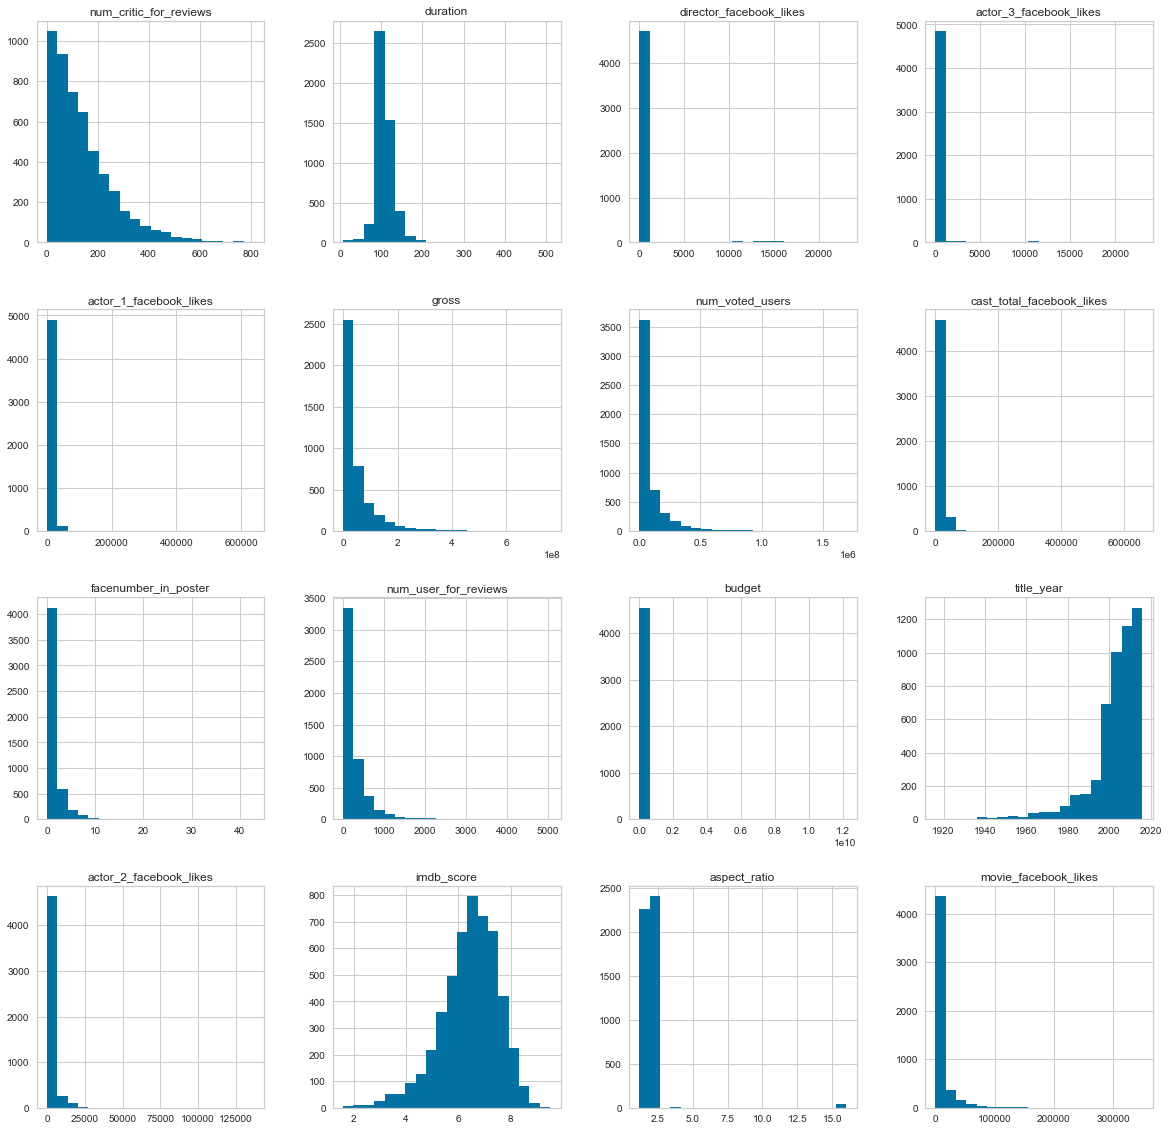

In [6]:
imdb.hist(bins=20,figsize=(20,20))


In [7]:
missing_values = imdb.isna().sum()
print(missing_values)

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


In [8]:
missing_values_count = imdb.isnull().sum()
total_missing_values = missing_values_count.sum()
print(total_missing_values)

2679


# Preprocessing

In [9]:
imdb1 = imdb
#imdb1 = imdb1.fillna(imdb1.median())

In [10]:
score_list = list(imdb1['imdb_score'].values)
score_count = dict()

for i in score_list:
  if str(i) in score_count:
    score_count[str(i)] += 1
  else:
    score_count[str(i)] = 1

In [11]:
score_count = {k: v for k, v in sorted(score_count.items(), key = lambda item: item[1], reverse = True)}

In [12]:
score_count['6.7'] + score_count['6.6'] + score_count['6.8'] 

605

In [13]:
remove_score = {6.6, 6.7, 6.8}

In [15]:
column_names = imdb.columns.values
num_columns = list()
cat_columns = list()

for c in column_names:
  if imdb[f'{c}'].dtype not in ['float64', 'int64'] :
    cat_columns.append(c)
  else: num_columns.append(c)

In [16]:
float_df = imdb[num_columns].astype('float64')

In [17]:
float_df = float_df.loc[float_df['imdb_score'].isin(set(score_list) - remove_score)]

In [18]:
float_df['imdb_score'] = float_df['imdb_score'].apply(lambda x: 0 if x < 6.6 else 1)
float_df['imdb_score']

0       1
1       1
3       1
4       1
6       0
       ..
5037    0
5038    1
5039    1
5040    0
5041    0
Name: imdb_score, Length: 4438, dtype: int64

In [19]:
label_classes = ['low', 'high']

array([[<AxesSubplot: title={'center': 'num_critic_for_reviews'}>,
        <AxesSubplot: title={'center': 'duration'}>,
        <AxesSubplot: title={'center': 'director_facebook_likes'}>,
        <AxesSubplot: title={'center': 'actor_3_facebook_likes'}>],
       [<AxesSubplot: title={'center': 'actor_1_facebook_likes'}>,
        <AxesSubplot: title={'center': 'gross'}>,
        <AxesSubplot: title={'center': 'num_voted_users'}>,
        <AxesSubplot: title={'center': 'cast_total_facebook_likes'}>],
       [<AxesSubplot: title={'center': 'facenumber_in_poster'}>,
        <AxesSubplot: title={'center': 'num_user_for_reviews'}>,
        <AxesSubplot: title={'center': 'budget'}>,
        <AxesSubplot: title={'center': 'title_year'}>],
       [<AxesSubplot: title={'center': 'actor_2_facebook_likes'}>,
        <AxesSubplot: title={'center': 'imdb_score'}>,
        <AxesSubplot: title={'center': 'aspect_ratio'}>,
        <AxesSubplot: title={'center': 'movie_facebook_likes'}>]],
      dtype=o

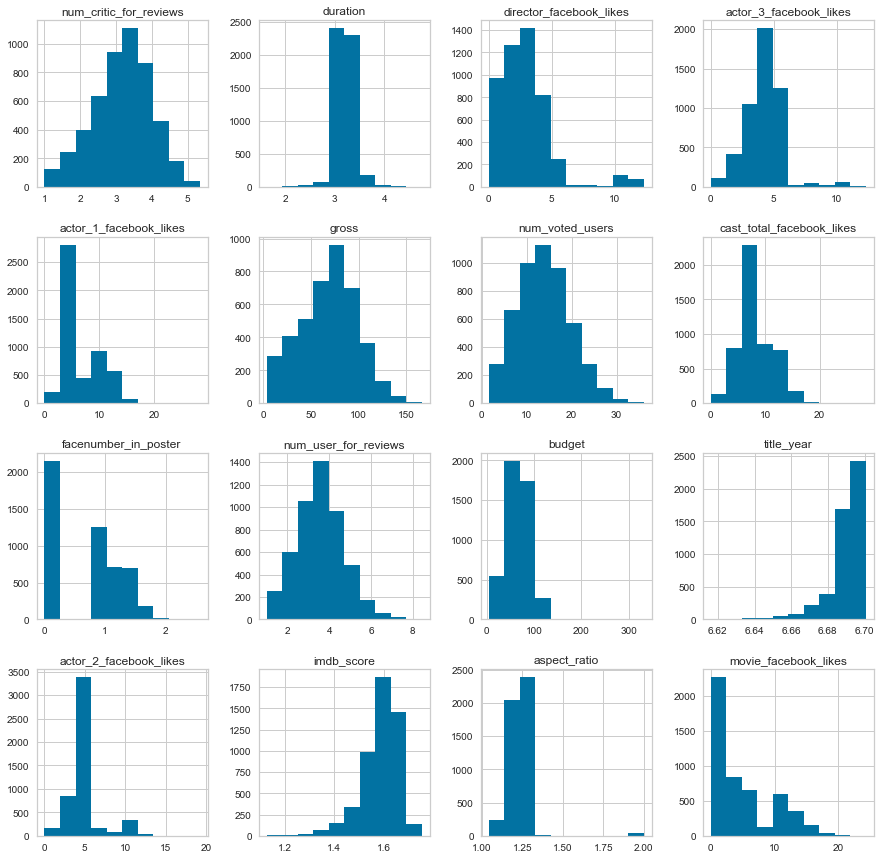

In [20]:
np.sqrt(np.sqrt(imdb[num_columns])).hist(figsize = (15, 15))

In [21]:
x = float_df.drop(['imdb_score'], axis = 1)
y = float_df['imdb_score'].to_numpy()

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [34]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(x_train)
x_train = pd.DataFrame(imp.transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(imp.transform(x_test), columns = x_train.columns)

In [35]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_train.columns)

/var/folders/j4/2_v3b6vn7t98z8kg_njz6lv00000gn/T/ipykernel_51776/175807136.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = imdb1.corr()


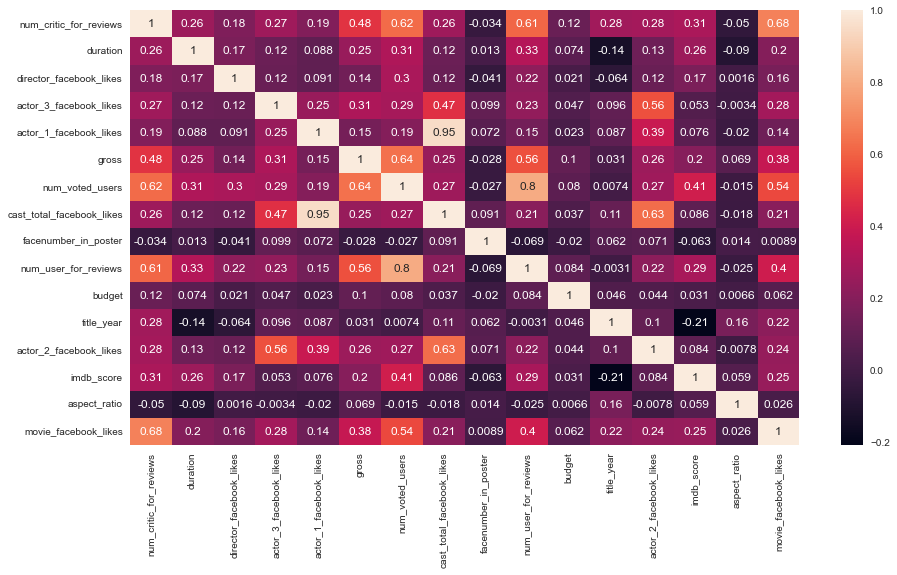

In [36]:
# Calculate the correlation matrix
corr_matrix = imdb1.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [37]:
index_names = x_train.corr()['num_critic_for_reviews'].index.values

selected_features = [index_names[i] for i, v in enumerate(x_train.corr()['num_critic_for_reviews']) if v < 0.5 and v > -0.5]

In [38]:
selected_features

['duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'aspect_ratio']

In [39]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [40]:
print(f"Classification Report: \n{metrics.classification_report(y_test, y_pred, target_names = label_classes)}\n")
print(f"Accuracy on the training set: {lr.score(x_train, y_train).round(3)}\n")
print(f"Accuracy on the test set: {lr.score(x_test, y_test).round(3)}\n")

Classification Report: 
              precision    recall  f1-score   support

         low       0.74      0.89      0.80       753
        high       0.80      0.59      0.68       579

    accuracy                           0.76      1332
   macro avg       0.77      0.74      0.74      1332
weighted avg       0.76      0.76      0.75      1332


Accuracy on the training set: 0.738

Accuracy on the test set: 0.756



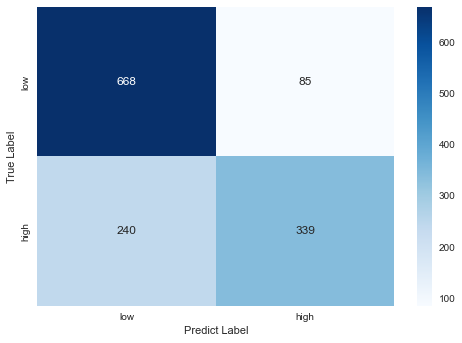

In [41]:
cf = metrics.confusion_matrix(y_test, y_pred).round(3)
sns.heatmap(cf, annot = True, cmap = 'Blues', xticklabels = label_classes, yticklabels = label_classes, fmt = 'g')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

In [42]:
np.exp(lr.coef_)

array([[ 1.11188805,  1.42620643,  1.14861763,  1.12995413,  8.15286129,
         0.43449913, 12.18252422,  0.07960009,  0.87911167,  0.61819669,
         1.01093099,  0.56708874,  1.70133255,  1.21838455,  1.35693757]])

In [43]:
lr.intercept_

array([0.01390252])

In [44]:
x_test.shape

(1332, 15)

In [48]:
metrics.roc_auc_score(y_test, lr.decision_function(x_test), multi_class='ovr')
# metrics.roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1], multi_class='ovr')

0.7856243420101976

In [52]:
y_train.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [53]:
y_test.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [54]:
x_train

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,-0.664916,-0.281781,-0.221340,0.065527,-0.337831,-0.392010,-0.455664,-0.179748,1.886091,-0.468689,0.004188,0.198588,-0.168725,0.115782,-0.342764
1,-0.763881,0.374011,-0.182220,-0.196447,0.266776,0.597787,-0.026432,0.154711,-0.187241,-0.357920,0.024810,-0.839822,-0.260281,0.115782,-0.381485
2,-0.615433,-0.281781,-0.243190,-0.353508,-0.393516,-0.684914,-0.552701,-0.478658,0.331092,-0.643860,-0.057678,0.917488,-0.367912,0.115782,-0.381485
3,0.341237,1.338410,-0.244248,-0.372752,0.569080,-0.592814,2.913934,0.323921,0.849425,1.298471,-0.155838,-2.916641,-0.375833,0.115782,0.612648
4,0.102070,-0.667541,-0.244248,0.125123,-0.156449,-0.611949,0.220659,-0.132418,-0.705574,0.628702,-0.136041,-0.280678,-0.174316,-0.291562,-0.381485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3101,-0.491725,-2.403459,-0.234380,-0.323089,-0.363648,-0.684667,-0.494551,-0.437371,-0.187241,-0.597491,0.024810,0.438221,-0.337859,0.115782,-0.381485
3102,-0.516467,-0.397509,-0.233322,-0.045595,-0.156449,-0.524000,-0.403860,-0.168728,-0.705574,0.116071,-0.119543,-0.280678,-0.155446,-0.291562,-0.381485
3103,-0.120603,-0.551813,3.632495,-0.087188,-0.216910,-0.102613,-0.023325,-0.219410,0.331092,-0.056524,0.037183,-0.200800,-0.249798,0.115782,-0.381485
3104,-1.036037,1.647017,-0.242133,-0.375236,-0.340008,-0.306386,-0.517102,-0.439707,-0.187241,-0.620675,-0.082424,0.518099,-0.378629,0.115782,-0.343062


/Users/jarkrunglerdkriangkrai/opt/anaconda3/envs/bigdata/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


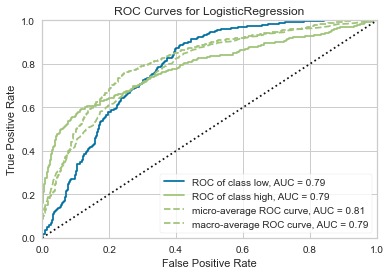

In [55]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(lr, classes = label_classes);
visualizer.fit(x_train, y_train); # Fit the training data to the visualizer
visualizer.score(x_test, y_test); # Evaluate the model on the test data
visualizer.show(); 